## Data Visualization

- 

Plotting (matplotlib)
    - Line
    - Scater
    - Histogram
    - Heatmap
    - Faceting
- Other ways of ploting (libraries)
    - Altair and Bokeh
- Interactive plots (Plotly)
- Mapping
- Streamlit

### Plotting

I have decided to use matplotlib as my base level to plot everything.

Here I'm going to implement some examples

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

#### Example 1 Line

In [4]:
snb_df = pd.read_csv(r"D:\Step_out\0_IT_Studies\Propulsion_Academy_Gitlab\juan-aguirre\03_Visualization\day1\data\snb-data-zimoma-en-all-20200901_1437.csv", sep=";", skiprows=2)
snb_df = snb_df.rename({'D0': 'Instrument'}, axis=1)
snb_df['Date'] = pd.to_datetime(snb_df['Date'])
snb_df = snb_df.set_index(['Date', 'Instrument']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
snb_df = snb_df[term_order]

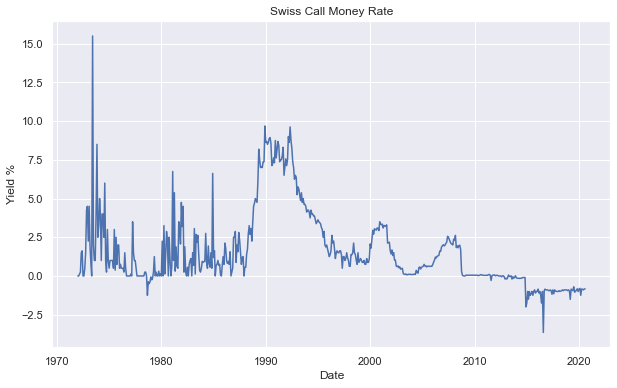

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(snb_df.index, snb_df["1TGT"])

ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("Date")
ax.set_ylabel("Yield %");

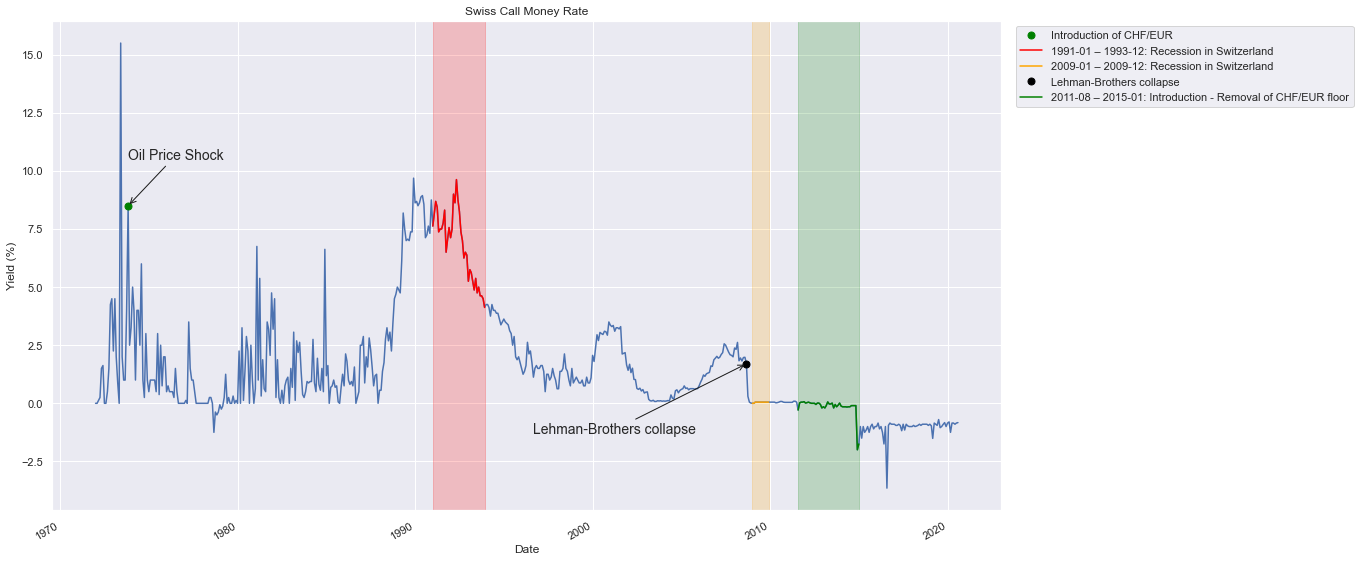

In [6]:
# Here I'm firstly creating the dataframe and then plotting it

fig, ax = plt.subplots(figsize=(17, 10))
ax.plot(snb_df.index, snb_df["1TGT"])
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01 = snb_df[snb_df.index == "1973-11"]['1TGT']

a_TGT_1973_01.plot(kind="line", style="o", ms=7, c="green", label='Introduction of CHF/EUR')

arrow_x = str(a_TGT_1973_01.index[0])
arrow_y = a_TGT_1973_01
text_x = str(a_TGT_1973_01.index[0])
text_y = arrow_y + 2
ax.annotate('Oil Price Shock', xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)


# 1991-01 – 1993-12: Recession in Switzerland
b_recession = snb_df[(snb_df.index.year >= 1991) & (snb_df.index.year <= 1993)]

b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);


# 2009-01 – 2009-12: Recession in Switzerland
c_recession = snb_df[(snb_df.index.year == 2009)]

c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)


# 2008-09: Lehman-Brothers collapse
d_collapse = snb_df[(snb_df.index == "2008-09")]

    # plotting
d_collapse["1TGT"].plot(kind="line", style="o", ms=7, c="black", label='Lehman-Brothers collapse')

arrow_xd = str(d_collapse.index[0])
arrow_yd = d_collapse["1TGT"]
text_xd = "1996-09"
text_yd = arrow_yd - 3
ax.annotate('Lehman-Brothers collapse', xy=(arrow_xd, arrow_yd), xytext=(text_xd, text_yd), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)


# 2011-08: Introduction of CHF/EUR floor # 2015-01: Removal of CHF/EUR floor
    # dataframe
e_CHF = c_recession = snb_df[(snb_df.index >= '2011-08') & (snb_df.index <= '2015-01')]
    # plotting
e_CHF["1TGT"].plot(kind="line", c="green", label='2011-08 – 2015-01: Introduction - Removal of CHF/EUR floor')
ax.axvspan("2011-08", "2015-01", color="green", alpha=0.2)

# Implementing the legend
ax.legend(bbox_to_anchor=(1.01, 1), loc=2);

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.rc('pdf',fonttype=42)
plt.savefig('Swiss_economy.pdf')

#### Example 2 Line

In [12]:
mort_df = pd.read_csv(r"D:\Step_out\0_IT_Studies\Propulsion_Academy_Gitlab\juan-aguirre\03_Visualization\day1\data\morts_2020-05-18.csv")
month_day_df = mort_df['mois_jour'].str.split("/", expand=True)
month_day_df.columns = ['month', 'day']
month_day_df = month_day_df.astype('int32')
mort_df = month_day_df.join(mort_df)
# Get rid of Feb 29, we can ignore it
mort_df = mort_df.dropna(axis=0, subset=['2001'])

import datetime
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_cutoff = np.array([0] + days_in_month).cumsum()[:-1]
month_names = [datetime.date(2020, i+1, 1).strftime("%h") for i in range(len(days_in_month))]

Text(280, 1200, 'Mean deaths, 2000-2019')

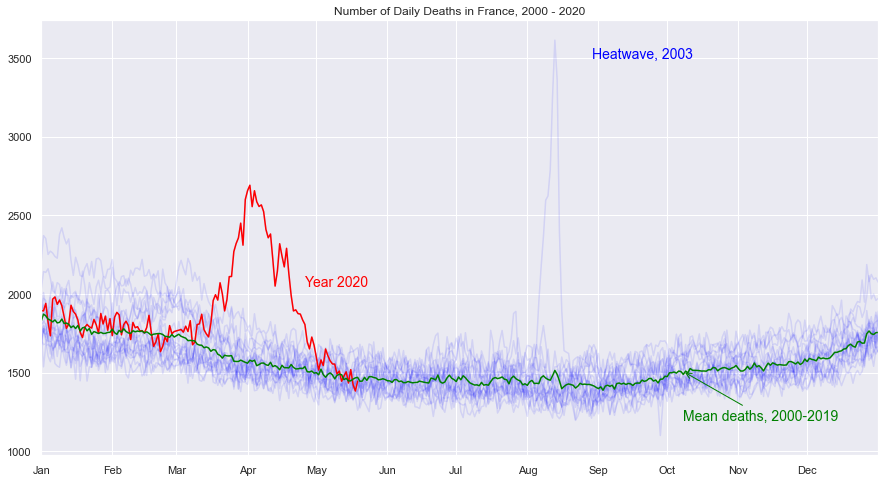

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))

for year in mort_df.columns[4:]:
    ax.plot(mort_df.index, mort_df[year], alpha=0.1, color="blue")
    
ax.plot(mort_df.index, mort_df["2020"], color="red")
    
ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);
ax.annotate(xy=[115,mort_df["2020"][25] + 300], text="Year 2020", color = "red", fontsize=14)

ax.annotate(xy=[8 * 30 ,3500], text="Heatwave, 2003", color = "blue", fontsize=14)

normal_years = [str(year) for year in range(2000, 2020)]
mort_mean = mort_df[normal_years].mean(axis=1)
ax.plot(mort_mean, c="green")
arrow_x = mort_mean.index[9*31]
arrow_y = mort_mean[9*31]
text_x = mort_mean.index[9*31]
text_y = 1200
ax.annotate(text="Mean deaths, 2000-2019", color = "green", xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='green'), fontsize=14)

#### Example 1 Scatter

In [7]:
mpg_df = pd.read_csv(r"D:\Step_out\0_IT_Studies\Propulsion_Academy_Gitlab\juan-aguirre\03_Visualization\day1\data\mpg.csv")

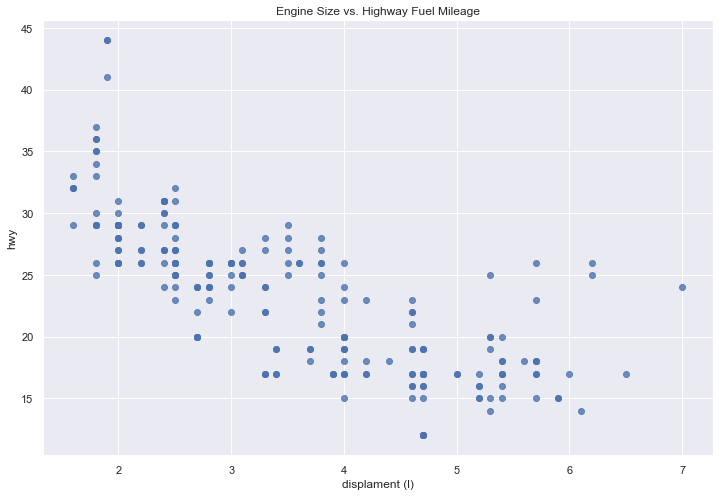

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.8)

ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel("displament (l)")
ax.set_ylabel("hwy");

In [9]:
# Structuring the data
best_df = mpg_df[mpg_df['hwy'] == max(mpg_df['hwy'])].reset_index(drop=True)
best_df_u = best_df["manufacturer"].unique()

worst_df = mpg_df[mpg_df['hwy'] == min(mpg_df['hwy'])].reset_index(drop=True)
worst_df_u = worst_df["manufacturer"].unique()

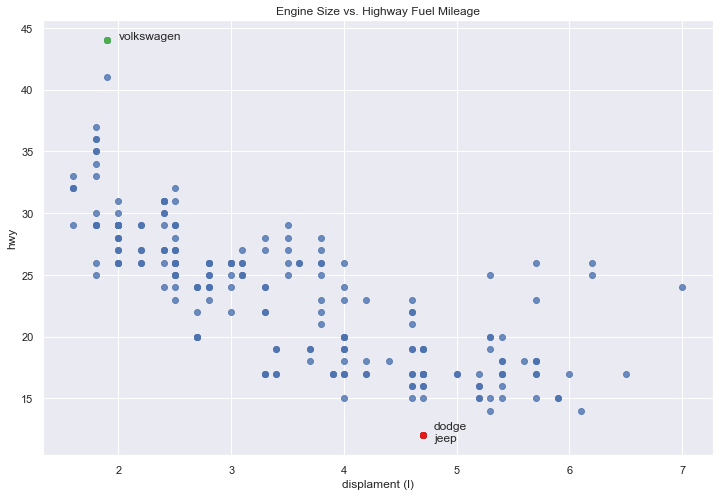

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.8)

ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel("displament (l)")
ax.set_ylabel("hwy");

# Use Brewer Set1 green for the best (#4DAF4A) and the red for the worst (#E41A1C)
# Make the dot size larger (10 points, s = 100)
# Label the point with manufacturer(s) of automobile (column manufacturer in the dataframe)

ax.scatter(best_df['displ'], best_df['hwy'], color ="#4DAF4A", alpha=0.9)
ax.annotate(xy=[best_df['displ'][0] + 0.1, best_df["hwy"][0] + 0.1], text=best_df_u[0])

ax.scatter(worst_df['displ'], worst_df['hwy'], color ="#E41A1C", alpha=0.9)
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] + 0.5], text=worst_df_u[0])
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] - 0.5], text=worst_df_u[1]);

#### Example 2 Scatter

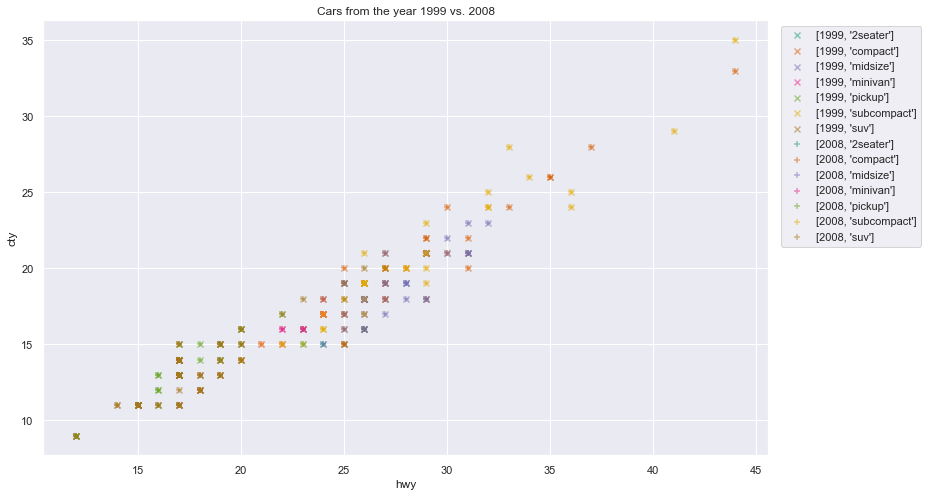

In [31]:
# Color Palette
pal = sns.color_palette("Dark2")

fig, ax = plt.subplots(figsize=(13,8))
marks = ["x", "+"]

for i, (name1, gdf) in enumerate(mpg_df.groupby('year')): # Give you number, name of the group and the subset of that roup
    for o, (name2, gdf) in enumerate(mpg_df.groupby('class')):
        ax.scatter(gdf["hwy"], gdf["cty"], marker=marks[i], color=pal[o], alpha=0.5, label=[name1, name2])

ax.set_title("Cars from the year 1999 vs. 2008")
ax.set_xlabel("hwy")
ax.set_ylabel("cty");

ax.legend(bbox_to_anchor=(1.01, 1));

#### Example 1 Histogram

In [32]:
antibiotics_df = pd.read_json(r"D:\Step_out\0_IT_Studies\Propulsion_Academy_Gitlab\juan-aguirre\03_Visualization\day1\data\burtin.json", orient='records').set_index(['bacteria', 'gram'])
antibiotics_df = antibiotics_df.stack().reset_index()
# mic = minimum inhibitory concentration
antibiotics_df.columns = ['bacteria', 'gram', 'antibiotic', 'mic']
# assign an id to each bacterium
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(antibiotics_df['bacteria'])))}
antibiotics_df['bid'] = antibiotics_df.apply(lambda x: bid_dict[x['bacteria']], 1)
# extract the genus of each bacterium
antibiotics_df['genus'] = antibiotics_df['bacteria'].apply(lambda x: x.split(" ")[0])

In [34]:
df_51 = antibiotics_df[antibiotics_df["antibiotic"] == "penicillin"]
df_51

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.000,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.000,10,Salmonella
6,Proteus vulgaris,negative,penicillin,3.000,7,Proteus
9,Klebsiella pneumoniae,negative,penicillin,850.000,5,Klebsiella
12,Brucella abortus,negative,penicillin,1.000,1,Brucella
15,Pseudomonas aeruginosa,negative,penicillin,850.000,8,Pseudomonas
18,Escherichia coli,negative,penicillin,100.000,4,Escherichia
21,Salmonella (Eberthella) typhosa,negative,penicillin,1.000,9,Salmonella
24,Aerobacter aerogenes,negative,penicillin,870.000,0,Aerobacter
27,Brucella antracis,positive,penicillin,0.001,2,Brucella


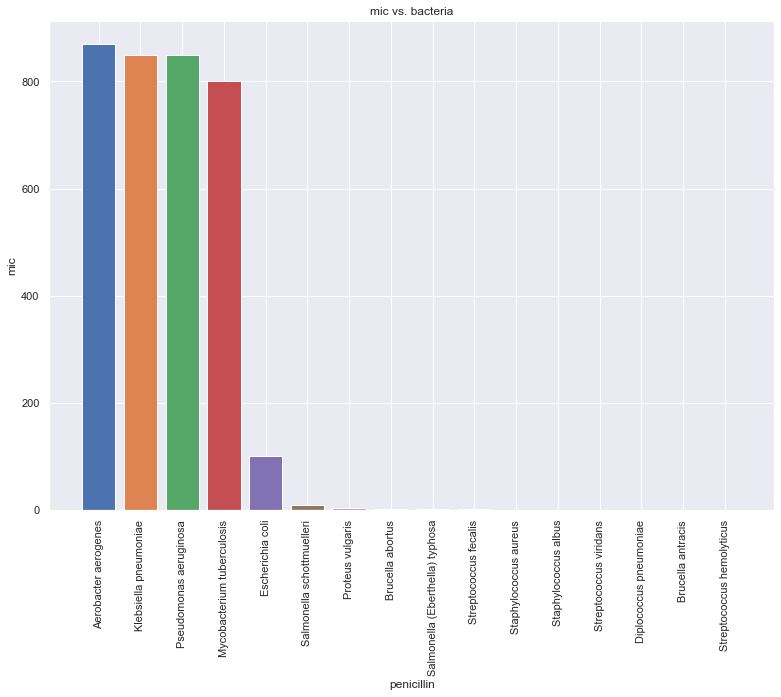

In [47]:
# If you want the data sorted, you have to do it outside
df_51_sort = df_51.sort_values(by=["mic"], ascending=False)

fig, ax = plt.subplots(figsize=(13,9))

ax.bar(df_51_sort["bacteria"], df_51_sort["mic"], color=sns.color_palette())

ax.set_xlabel('penicillin')
ax.set_ylabel('mic')
ax.set_title('mic vs. bacteria')
ax.xaxis.set_tick_params(rotation=90)

**Scaling the bars**

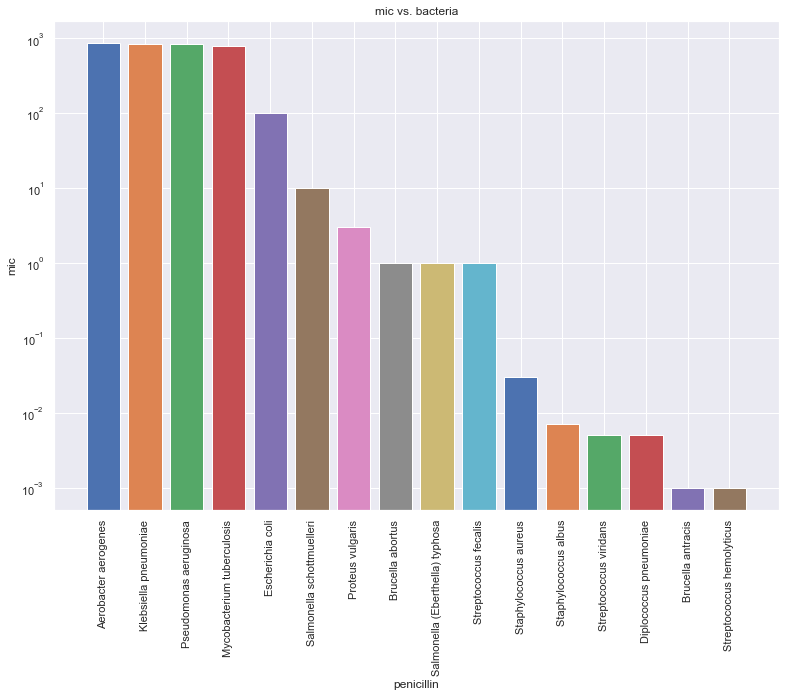

In [53]:
fig, ax = plt.subplots(figsize=(13,9))

ax.bar(df_51_sort["bacteria"], df_51_sort["mic"], color=sns.color_palette())

ax.set_xlabel('penicillin')
ax.set_ylabel('mic')
ax.set_title('mic vs. bacteria')
ax.xaxis.set_tick_params(rotation=90)
ax.set_yscale("log")

#### Mixing Seaborn and Matplotlib

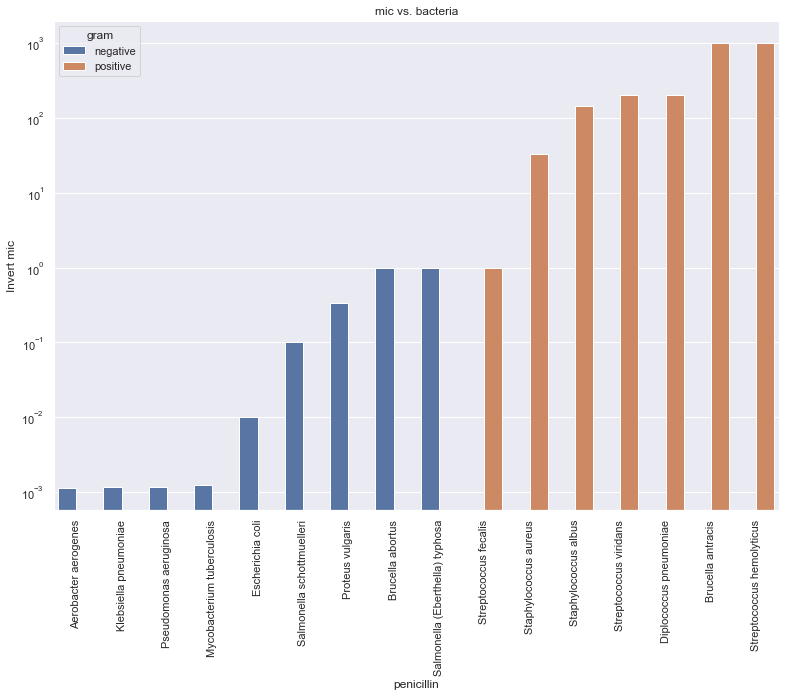

In [54]:
# Could be useful if you want to use some characteristic as hue or order

fig, ax = plt.subplots(figsize=(13,9))

ax = sns.barplot(x=df_51["bacteria"], y=1/df_51["mic"], order=df_51.sort_values("mic", ascending=False).bacteria, hue=df_51["gram"])

ax.set_xlabel('penicillin')
ax.set_ylabel('Invert mic')
ax.set_title('mic vs. bacteria')
ax.xaxis.set_tick_params(rotation=90)
ax.set_yscale("log")

#### Example 1 Heatmap

#### Example 1 Faceting

### Other ways of ploting (libraries)

[Altair](https://altair-viz.github.io) and [Bokeh](https://docs.bokeh.org/en/latest/) are two plotting libraries that are newer than MPL. They have certain advantages. They render to HTML, making it easy to add interactions (mouse-over tooltips), and they have easier to understand APIs. They have disadvantages as well, though. Altair, for example, does not give you complete control of your plot, the way matplotlib does.

Every python data scientists need to be comfortable with matplotlib, because you will encounter it everywhere, but you may want to look at Altair, or Bokeh, or Holoviews, or another library for your projects.